# Flowcharts

In [3]:
from pathlib import Path
import sys

BASE_DIR = Path('.').resolve().parent
sys.path.append(str(BASE_DIR))

In [4]:
import matplotlib.pyplot as plt

In [5]:
%load_ext autoreload
%autoreload 2

from scripts.flowchart import Flowchart, save_pdf

In [6]:
PATH_TO_PLOTS = BASE_DIR / 'plots' / 'article'

## Decision Tree

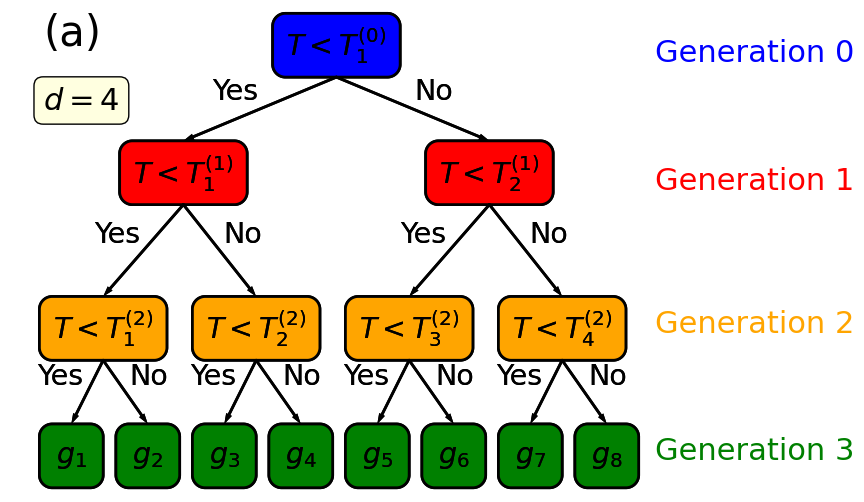

In [50]:
with Flowchart(block_width=3, block_height=1.5, font_size=22) as flow:
    horizontal_shift = 0.6 * flow.block_width
    vertical_shift = -2 * flow.block_height
    colors = ['blue', 'red', 'orange', 'green']
    
    node_0 = flow.add_round_box(label=r'$T<T_1^{(0)}$', color=colors[0])
    
    node_1_1 = flow.add_round_box(label=r'$T<T_1^{(1)}$', color=colors[1], position=(-2*horizontal_shift, vertical_shift))
    node_1_2 = flow.add_round_box(label=r'$T<T_2^{(1)}$', color=colors[1], position=(+2*horizontal_shift, vertical_shift))
    flow += flow.get_arrow(label='Yes').at(node_0.S).to(node_1_1.N)
    flow += flow.get_arrow(label='No').at(node_0.S).to(node_1_2.N)
    
    node_2_1 = flow.add_round_box(label=r'$T<T_1^{(2)}$', color=colors[2], position=(-3*horizontal_shift, 2 * vertical_shift))
    node_2_2 = flow.add_round_box(label=r'$T<T_2^{(2)}$', color=colors[2], position=(-1*horizontal_shift, 2 * vertical_shift))
    flow += flow.get_arrow(label='Yes').at(node_1_1.S).to(node_2_1.N)
    flow += flow.get_arrow(label='No').at(node_1_1.S).to(node_2_2.N)
    
    node_2_3 = flow.add_round_box(label=r'$T<T_3^{(2)}$', color=colors[2], position=(+1*horizontal_shift, 2 * vertical_shift))
    node_2_4 = flow.add_round_box(label=r'$T<T_4^{(2)}$', color=colors[2], position=(+3*horizontal_shift, 2 * vertical_shift))
    flow += flow.get_arrow(label='Yes').at(node_1_2.S).to(node_2_3.N)
    flow += flow.get_arrow(label='No').at(node_1_2.S).to(node_2_4.N)
    
    flow.block_width = 1.5
    
    node_3_1 = flow.add_round_box(label=r'$g_1$', color=colors[3], position=(-3*horizontal_shift, 3 * vertical_shift))
    node_3_2 = flow.add_round_box(label=r'$g_2$', color=colors[3], position=(-2*horizontal_shift, 3 * vertical_shift))
    flow += flow.get_arrow(label='Yes').at(node_2_1.S).to(node_3_1.N)
    flow += flow.get_arrow(label='No').at(node_2_1.S).to(node_3_2.N)
    
    node_3_3 = flow.add_round_box(label=r'$g_3$', color=colors[3], position=(-1*horizontal_shift, 3 * vertical_shift))
    node_3_4 = flow.add_round_box(label=r'$g_4$', color=colors[3], position=(-0*horizontal_shift, 3 * vertical_shift))
    flow += flow.get_arrow(label='Yes').at(node_2_2.S).to(node_3_3.N)
    flow += flow.get_arrow(label='No').at(node_2_2.S).to(node_3_4.N)
    
    node_3_5 = flow.add_round_box(label=r'$g_5$', color=colors[3], position=(+1*horizontal_shift, 3 * vertical_shift))
    node_3_6 = flow.add_round_box(label=r'$g_6$', color=colors[3], position=(+2*horizontal_shift, 3 * vertical_shift))
    flow += flow.get_arrow(label='Yes').at(node_2_3.S).to(node_3_5.N)
    flow += flow.get_arrow(label='No').at(node_2_3.S).to(node_3_6.N)
    
    node_3_7 = flow.add_round_box(label=r'$g_7$', color=colors[3], position=(+3*horizontal_shift, 3 * vertical_shift))
    node_3_8 = flow.add_round_box(label=r'$g_8$', color=colors[3], position=(+4*horizontal_shift, 3 * vertical_shift))
    flow += flow.get_arrow(label='Yes').at(node_2_4.S).to(node_3_7.N)
    flow += flow.get_arrow(label='No').at(node_2_4.S).to(node_3_8.N)
    figure = flow.draw()
    x_text = +5*horizontal_shift
    y_text = -0.25*flow.block_height
    figure.ax.text(s='Generation 0', x=x_text, y=y_text, color=colors[0], fontsize=22)
    figure.ax.text(s='Generation 1', x=x_text, y=y_text+vertical_shift, color=colors[1], fontsize=22)
    figure.ax.text(s='Generation 2', x=x_text, y=2*y_text+2*vertical_shift, color=colors[2], fontsize=22)
    figure.ax.text(s='Generation 3', x=x_text, y=2*y_text+3*vertical_shift, color=colors[3], fontsize=22)
    figure.ax.text(s='(a)', x=-3*horizontal_shift, y=0, fontsize=30)
    figure.ax.text(s=r'$d=4$', x=-3*horizontal_shift, y=0.5*vertical_shift, fontsize=22, bbox=dict(boxstyle='round', facecolor='lightyellow'))
    figure.fig.set_size_inches(15/2.54, 15/2.54)
    save_pdf(flowchart=flow, filename=PATH_TO_PLOTS / 'decision_tree_example')

## Hooke-Jeeves (Article)

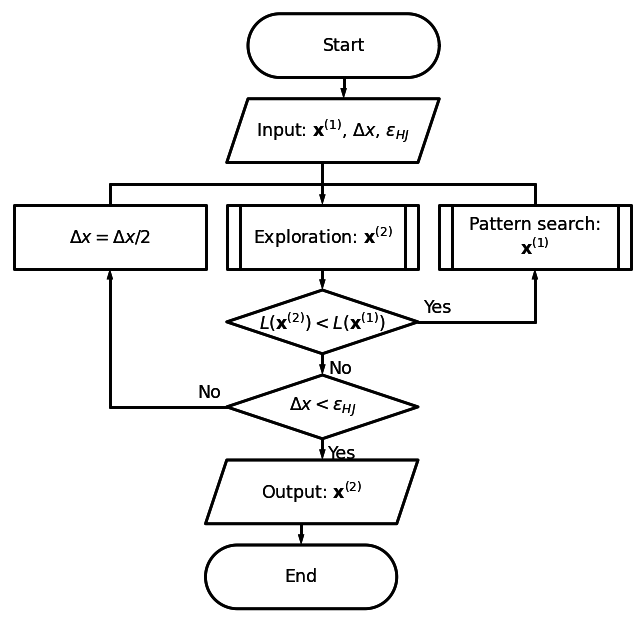

In [5]:
with Flowchart(block_width=4.5, block_height=1.5, font_size=14) as flow:
    flow.start()
    flow.add_data(
        label=r'Input: $\mathbf{x}^{(1)}$, $\Delta{x}$, $\varepsilon_{HJ}$',
        l_scale=2,
    )
    flow.add_subroutine(label=r'Exploration: $\mathbf{x}^{(2)}$')
    decision_1 = flow.add_decision(
        label=r'$L(\mathbf{x}^{(2)})<L(\mathbf{x}^{(1)})$',
        S='No',
        E='Yes',
    )
    decision_2 = flow.add_decision(
        label=r'$\Delta{x}<\varepsilon_{HJ}$',
        S='Yes', 
        W='No',
    )
    flow.add_data(label=r'Output: $\mathbf{x}^{(2)}$')
    flow.end()
    
    pattern_search = flow.open_branch(
        start=decision_1.E,
        directions='ru',
        label='Pattern search:\n'+r'$\mathbf{x}^{(1)}$',
        element_name='subroutine',
    )
    flow.close_branch(
        start=pattern_search.N,
        directions='ul',
    )
    
    step_decrease = flow.open_branch(
        start=decision_2.W,
        directions='lu',
        vertical_shift=2 * flow.line_length + 1.5 * flow.block_height,
        label=r'$\Delta x = \Delta x / 2$',
    )
    flow.close_branch(
        start=step_decrease.N,
        directions='ur',
    )
    flow.save_pdf(filename=PATH_TO_PLOTS / 'flow_hooke_jeeves')

## Pattern Search (Article)

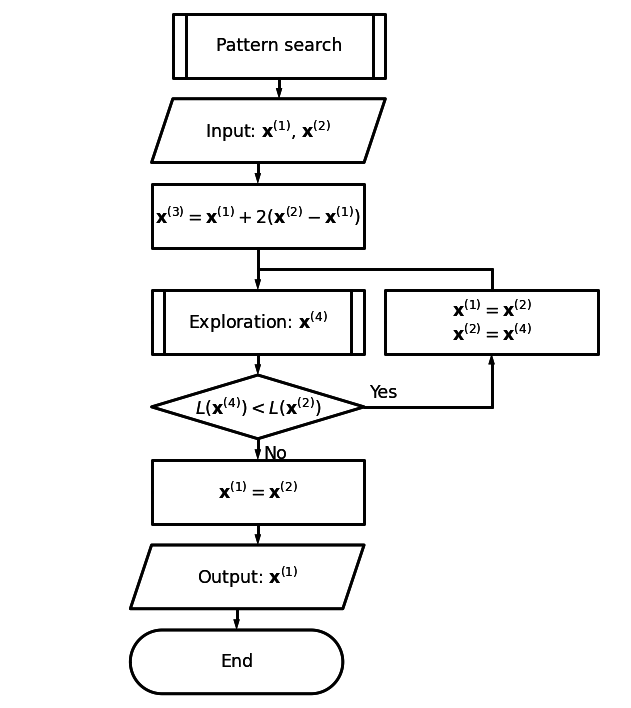

In [6]:
with Flowchart(block_width=5, block_height=1.5) as flow:
    flow.add_subroutine(label='Pattern search')
    flow.add_data(
        label=r'Input: $\mathbf{x}^{(1)}$, $\mathbf{x}^{(2)}$',
    )
    flow.add_rectangle(
        label=r'$\mathbf{x}^{(3)}=\mathbf{x}^{(1)}+2(\mathbf{x}^{(2)}-\mathbf{x}^{(1)})$',
        l_scale=2
    )
    flow.add_subroutine(label=r'Exploration: $\mathbf{x}^{(4)}$')
    decision_1 = flow.add_decision(
        label=r'$L(\mathbf{x}^{(4)})<L(\mathbf{x}^{(2)})$',
        S='No',
        E='Yes',
    )
    flow.add_rectangle(label=r'$\mathbf{x}^{(1)}=\mathbf{x}^{(2)}$')
    flow.add_data(label=r'Output: $\mathbf{x}^{(1)}$')
    flow.end()
    
    increment = flow.open_branch(
        start=decision_1.E,
        directions='ru',
        label=r'$\mathbf{x}^{(1)}=\mathbf{x}^{(2)}$'+'\n'+'$\mathbf{x}^{(2)}=\mathbf{x}^{(4)}$',
    )
    flow.close_branch(
        start=increment.N,
        directions='ul',
    )
    
    flow.save_pdf(filename=PATH_TO_PLOTS / 'flow_hj_pattern_search')

## Exploration (Article)

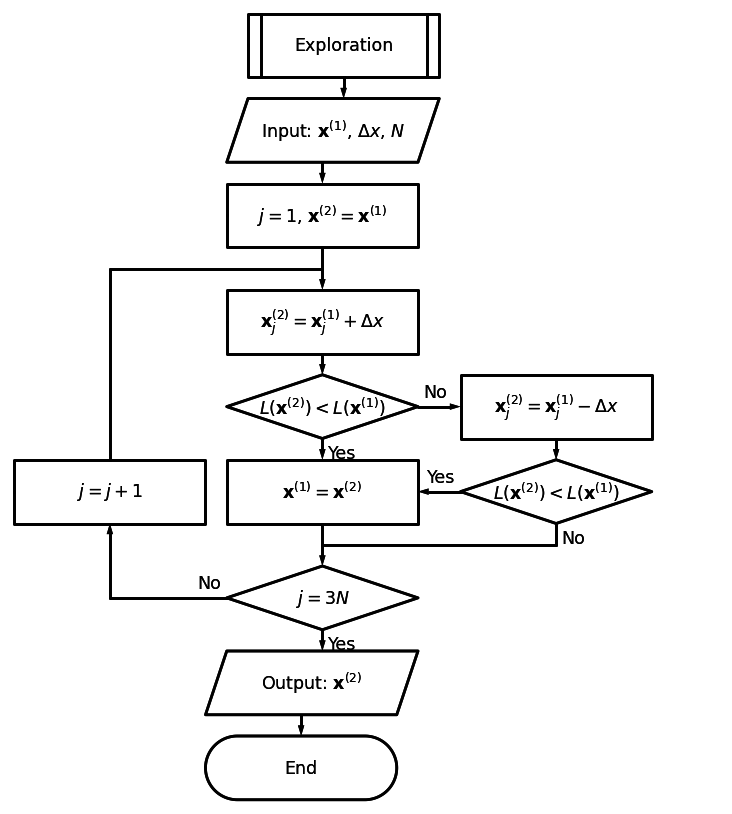

In [7]:
with Flowchart(block_width=4.5, block_height=1.5) as flow:
    flow.add_subroutine(label='Exploration')
    flow.add_data(
        label=r'Input: $\mathbf{x}^{(1)}$, $\Delta{x}$, $N$',
    )
    flow.add_rectangle(label=r'$j=1$, $\mathbf{x}^{(2)}=\mathbf{x}^{(1)}$', l_scale=2)
    flow.add_rectangle(label=r'$\mathbf{x}^{(2)}_j=\mathbf{x}^{(1)}_j+\Delta{x}$')
    decision_1 = flow.add_decision(
        label=r'$L(\mathbf{x}^{(2)})<L(\mathbf{x}^{(1)})$',
        E='No',
        S='Yes',
    )
    retain_block = flow.add_rectangle(
        label=r'$\mathbf{x}^{(1)}=\mathbf{x}^{(2)}$',
        l_scale=2,
    )
    decision_3 = flow.add_decision(
        label=r'$j=3N$',
        S='Yes',
        W='No',
    )
    flow.add_data(label=r'Output: $\mathbf{x}^{(2)}$')
    flow.end()
    
    flow += flow.get_arrow(l_scale=2).right().at(decision_1.E)
    decrease_block = flow.add_rectangle(label=r'$\mathbf{x}^{(2)}_j=\mathbf{x}^{(1)}_j-\Delta{x}$')
    decision_2 = flow.add_decision(
        label=r'$L(\mathbf{x}^{(2)})<L(\mathbf{x}^{(1)})$',
        S='No',
        W='Yes',
        is_arrowed_at_south=False
    )
    flow += flow.get_arrow(l_scale=2).left().at(decision_2.W)
    flow.close_branch(
        start=decision_2.S,
        directions='dl',
        horizontal_shift=2 * flow.line_length + flow.block_width,
    )
    
    next_block = flow.open_branch(
        start=decision_3.W,
        directions='lu',
        label=r'$j=j+1$',
        vertical_shift=0.5 * flow.block_height + 2 * flow.line_length,
    )
    flow.close_branch(
        start=next_block.N,
        directions='ur',
        vertical_shift=2 * flow.block_height + 3 * flow.line_length,
    )  
    
    flow.save_pdf(filename=PATH_TO_PLOTS / 'flow_hj_exploration')

## RMO (Article)

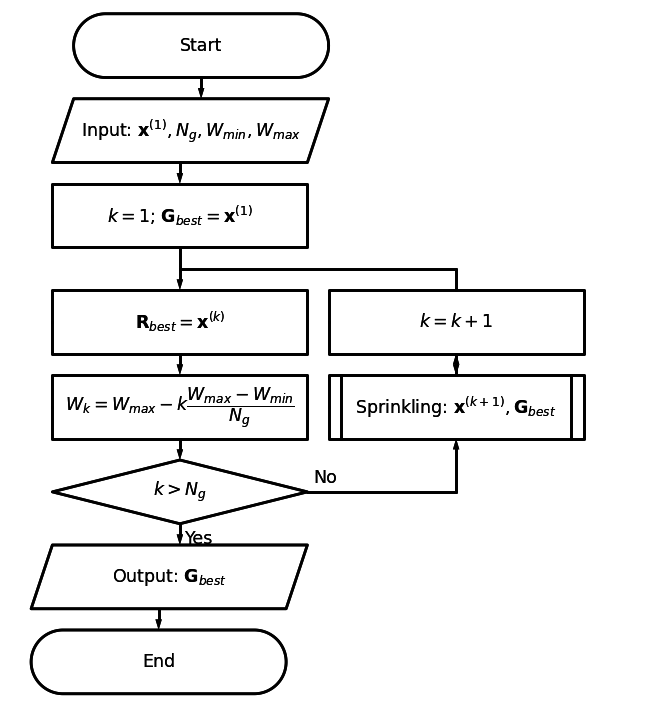

In [183]:
with Flowchart(block_width=6, block_height=1.5) as flow:
    flow.start()
    flow.add_data(
        label='Input: '+r'$\mathbf{x}^{(1)},N_g,W_{min},W_{max}$',
    )
    flow.add_rectangle(
        label='$k=1$; $\mathbf{G}_{best}=\mathbf{x}^{(1)}$',
        l_scale=2,
    )
    flow.add_rectangle(
        label=r'$\mathbf{R}_{best}=\mathbf{x}^{(k)}$'
    )
    flow.add_rectangle(
        label=r'$W_k=W_{max}-k\dfrac{W_{max}-W_{min}}{N_g}$',
    )
    decision = flow.add_decision(
        label='$k>N_g$',
        S='Yes',
        E='No',
    )
    flow.add_data(
        label='Output: $\mathbf{G}_{best}$',
    )
    flow.end()
    
    sprinkling = flow.open_branch(
        start=decision.E,
        directions='ru',
        label='Sprinkling: $\mathbf{x}^{(k+1)},\mathbf{G}_{best}$',
        element_name='subroutine',
    )
    flow += flow.get_arrow().up()
    increment = flow.add_rectangle(
        label=r'$k=k+1$'
    )
    flow.close_branch(
        start=increment.N,
        directions='ul',
    )
    flow.save_pdf(filename=PATH_TO_PLOTS / 'flow_rmo')

## Sprinkling (Article)

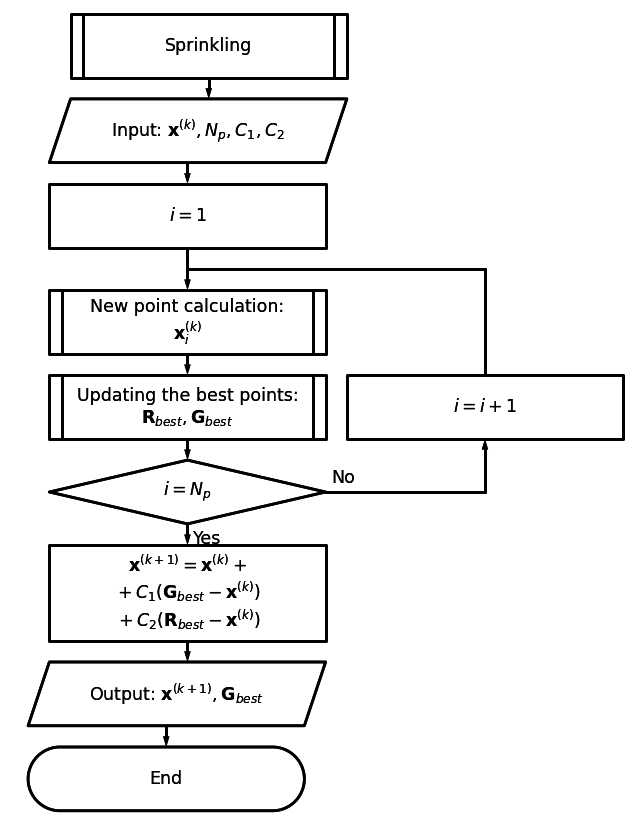

In [179]:
with Flowchart(block_width=6.5, block_height=1.5) as flow:
    flow.add_subroutine(label='Sprinkling')
    flow.add_data(
        label='Input: '+r'$\mathbf{x}^{(k)},N_p,C_1,C_2$',
    )
    flow.add_rectangle(
        label=r'$i=1$',
        l_scale=2,
    )
    flow.add_subroutine(label='New point calculation:\n' + r'$\mathbf{x}^{(k)}_i$')
    flow.add_subroutine(label='Updating the best points:\n' + r'$\mathbf{R}_{best},\mathbf{G}_{best}$')
    decision = flow.add_decision(
        label=r'$i=N_p$',
        E='No',
        S='Yes',
    )
    flow.add_rectangle(
        label=(
            r'$\mathbf{x}^{(k+1)}=\mathbf{x}^{(k)}+{}$'+'\n'
            +r'${}+C_1(\mathbf{G}_{best}-\mathbf{x}^{(k)})$'+'\n'
            +r'${}+C_2(\mathbf{R}_{best}-\mathbf{x}^{(k)})$'
        ),
        h_scale=1.5,
    )
    flow.add_data(
        label='Output: $\mathbf{x}^{(k+1)},\mathbf{G}_{best}$',
    )
    flow.end()    
    
    increment = flow.open_branch(
        start=decision.E,
        directions='ru',
        label=r'$i=i+1$',
    )
    flow.close_branch(
        start=increment.N,
        directions='ul',
        vertical_shift=2*flow.line_length+flow.block_height,
    )
    flow.save_pdf(filename=PATH_TO_PLOTS / 'flow_rmo_sprinkling')

## New point calculation for RMO (Article)

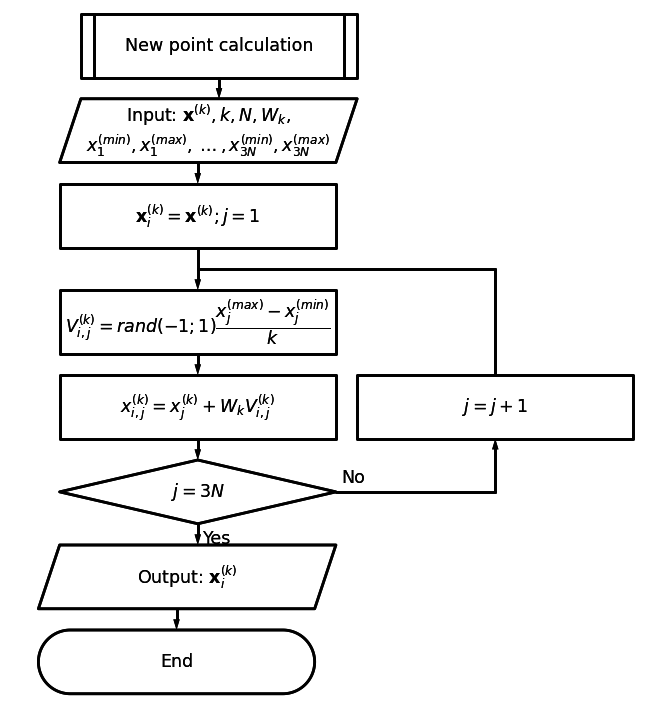

In [169]:
with Flowchart(block_width=6.5, block_height=1.5) as flow:
    flow.add_subroutine(label='New point calculation')
    flow.add_data(
        label='Input: '+r'$\mathbf{x}^{(k)},k,N,W_k$,'+'\n'+'$x^{(min)}_1,x^{(max)}_1,\dots,x^{(min)}_{3N},x^{(max)}_{3N}$',
    )
    flow.add_rectangle(
        label=r'$\mathbf{x}^{(k)}_i=\mathbf{x}^{(k)};j=1$',
        l_scale=2,
    )
    flow.add_rectangle(
        label=r'$V_{i,j}^{(k)}=rand(-1;1)\dfrac{x_j^{(max)}-x_j^{(min)}}{k}$'
    )
    flow.add_rectangle(
        label=r'$x_{i,j}^{(k)}=x_{j}^{(k)}+W_{k}V_{i,j}^{(k)}$'
    )
    decision = flow.add_decision(
        label=r'$j=3N$',
        E='No',
        S='Yes',
    )
    flow.add_data(label=r'Output: $\mathbf{x}^{(k)}_i$')
    flow.end()    
    
    increment = flow.open_branch(
        start=decision.E,
        directions='ru',
        label=r'$j=j+1$',
    )
    flow.close_branch(
        start=increment.N,
        directions='ul',
        vertical_shift=2*flow.line_length+flow.block_height,
    )
    flow.save_pdf(filename=PATH_TO_PLOTS / 'flow_rmo_new_point')

## Updating RMO best points (Article)

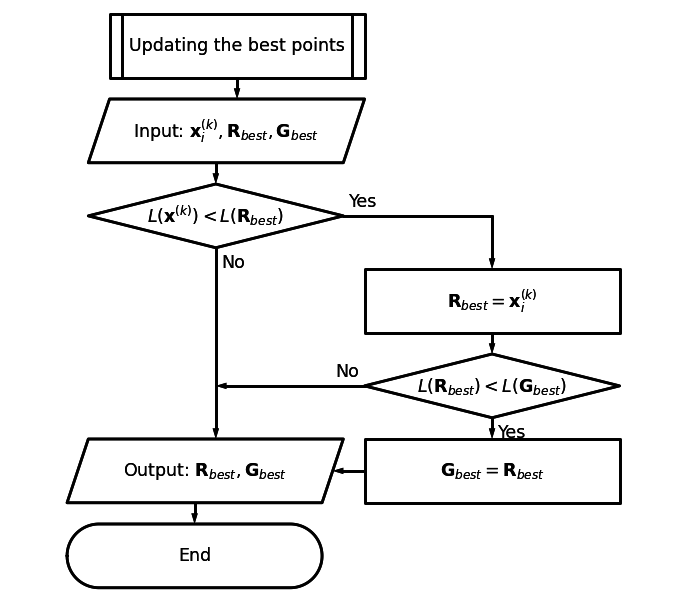

In [165]:
with Flowchart(block_width=6, block_height=1.5) as flow:
    flow.add_subroutine(label='Updating the best points')
    flow.add_data(
        label='Input: '+r'$\mathbf{x}^{(k)}_i,\mathbf{R}_{best},\mathbf{G}_{best}$',
    )
    decision_1 = flow.add_decision(
        label=r'$L(\mathbf{x}^{(k)})<L(\mathbf{R}_{best})$',
        E='Yes',
        S='No',
        l_scale=2 * (3 * flow.line_length + 2 * flow.block_height),
    )
    flow.add_data(
        label='Output: '+r'$\mathbf{R}_{best},\mathbf{G}_{best}$',
    )
    flow.end()
    
    flow.open_branch(
        start=decision_1.E,
        directions='rd',
        label=r'$\mathbf{R}_{best}=\mathbf{x}^{(k)}_i$'
    )
    flow += flow.get_arrow()
    decision_2 = flow.add_decision(
        label=r'$L(\mathbf{R}_{best})<L(\mathbf{G}_{best})$',
        S='Yes',
        W='No',
    )
    g_best_block = flow.add_rectangle(
        label=r'$\mathbf{G}_{best}=\mathbf{R}_{best}$',
        is_arrowed_at_south=False,
    )
    flow += flow.get_arrow(l_scale=1.5).at(g_best_block.W).left()
    flow += flow.get_arrow(l_scale=7).at(decision_2.W).left()
    
    
    flow.save_pdf(filename=PATH_TO_PLOTS / 'flow_rmo_update')

## Combination (Article)

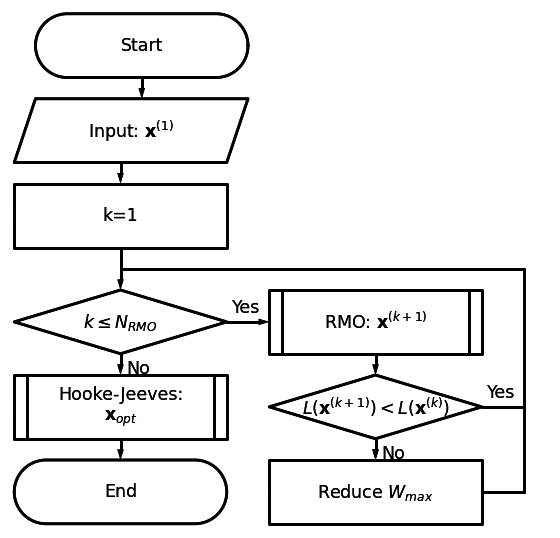

In [197]:
with Flowchart(block_width=5, block_height=1.5) as flow:
    flow.start()
    flow.add_data(
        label='Input: '
        +r'$\mathbf{x}^{(1)}$',
    )
    flow.add_rectangle(label='k=1', l_scale=2)
    decision_1 = flow.add_decision(
        label='$k\leq N_{RMO}$',
        E='Yes',
        S='No',
    )
    hj = flow.add_subroutine(label='Hooke-Jeeves:\n$\mathbf{x}_{opt}$')
    flow.end()
    
    
    flow += flow.get_arrow(l_scale=2).right().at(decision_1.E)
    rmo_block = flow.add_subroutine(label='RMO: $\mathbf{x}^{(k+1)}$')
    decision_2 = flow.add_decision(
        label='$L(\mathbf{x}^{(k+1)})<L(\mathbf{x}^{(k)})$',
        S='No',
        E='Yes',
    )
    flow += flow.get_arrow().down().at(decision_2.S)
    red = flow.add_rectangle(label='Reduce $W_{max}$', is_arrowed_at_south=False)
    
    flow += flow.get_line(l_scale=2).right().at(decision_2.E)
    flow += flow.get_line(l=1.5 * flow.block_height + 2 * flow.line_length).up()
    flow += flow.get_line(l=1.5 * flow.block_width + 4 * flow.line_length).left()
    
    flow += flow.get_line(l_scale=2).right().at(red.E)
    flow += flow.get_line(l=flow.block_height + flow.line_length).up()
    
    flow.save_pdf(filename=PATH_TO_PLOTS / 'flow_combination')

In [8]:
# with Flowchart(block_width=5, block_height=1.5) as flow:
#     flow.start()
#     flow.add_rectangle('Initialize points\nin a search space')
#     evaluate_kwargs = dict(
#         label='Evaluate\nthe objective function\nat each point',
#     )
#     flow.add_rectangle(**evaluate_kwargs)
#     choose_best = flow.add_rectangle('Choose\nthe best point\nas Centre', l_scale=2)
#     sprinkle = flow.add_rectangle('Sprinkle points\nfrom the centre\nmoving along the radii')
#     flow.add_rectangle(**evaluate_kwargs)
#     decision_1 = flow.add_decision(
#         label='Counter = 1',
#         S='Yes',
#         E='No',
#         is_arrowed_at_south=True,
#         l_scale=1,
#     )
#     eq_1 = flow.add_rectangle(
#         label='$Centre_{new}={}$\n${}=Centre_{old}+{}$\n${}+C_2*R_{best}$',
#         l_scale=2,
#     )
#     decision_2 = flow.add_decision(
#         label='$R_{best}<G_{best}$',
#         E='Yes',
#         S='No',
#         l_scale=2,
#     )
#     flow.add_rectangle('Counter++')
#     decision_3 = flow.add_decision(
#         label='Counter=max',
#         S='Yes',
#         W='No',
#     )
#     flow.end()
    
#     flow.horizontal_shift = 2 * flow.line_length + flow.block_width / 2
#     ne_1 = flow.open_branch(
#         start=decision_1.E,
#         directions='rd',
#         label='$Centre_{new}={}$\n${}=Centre_{old}+{}$\n${}+C_1*G_{best}+C_2*R_{best}$',
#     )
#     flow.close_branch(
#         start=ne_1.S,
#         directions='dl',
#     )
    
#     flow += flow.get_arrow(l_scale=2).right().at(decision_2.E)
#     ger = flow.add_rectangle('$R_{best}=G_{best}$', is_arrowed_at_south=False)
#     flow.close_branch(
#         start=ger.S,
#         directions='dl',
#     )
    
#     flow.add_elements(
#         flow.get_line(l_scale=2).left().at(decision_3.W),
#         flow.get_line(l=6.5 * flow.block_height + 9 * flow.line_length).up(),
#         flow.get_arrow(l=2 * flow.line_length + flow.block_width / 2).right(),
#     )
    
#     flow.save_pdf(filename=PATH_TO_PLOTS / 'flow_rmo')

In [9]:
# with Flowchart(block_width=6, block_height=2) as flow:
#     flow.start()
#     flow.add_rectangle('Initialize points\nin a search space')
#     flow.add_rectangle('Initialize sprinkling\nvelocities')
#     flow.add_rectangle('Counter = 1', l_scale=2)
#     decision_1 = flow.add_decision(
#         label='Counter ${}\leq N_{RMO}$',
#         E='Yes',
#         S='No',
#     )
#     hj = flow.add_rectangle('Run HJ')
#     flow.end()
    
    
#     flow += flow.get_arrow(l_scale=2).right().at(decision_1.E)
#     rmo_block = flow.add_rectangle('Run RMO')
#     decision_2 = flow.add_decision(
#         label='Is the\nobjective function\ndecreased?',
#         S='No',
#         E='Yes',
#     )
#     flow += flow.get_arrow().down().at(decision_2.S)
#     red = flow.add_rectangle('Reduce\nsprinkling velocities', is_arrowed_at_south=False)
    
#     flow += flow.get_line(l_scale=2).right().at(decision_2.E)
#     flow += flow.get_line(l=1.5 * flow.block_height + 2 * flow.line_length).up()
#     flow += flow.get_line(l=1.5 * flow.block_width + 4 * flow.line_length).left()
    
#     flow += flow.get_line(l_scale=2).right().at(red.E)
#     flow += flow.get_line(l=flow.block_height + flow.line_length).up()
    
#     flow.save_pdf(filename=PATH_TO_PLOTS / 'flow_rmo_hj')